In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**PART 1: Exploratory Data Analysis EDA**

In [ ]:
#We used the following lines of code for EDA(Exploratory Data)
train = pd.read_csv('train.csv')
train.head()
train.describe()
test=pd.read_csv("test.csv")
test.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,id
0,66149,0.352453,0.079074,0.049762,0.000113,2182.571837,1.068958e+06,2793.933194,365598.217794,4882.736629,...,54.443741,-7.310032,54.092850,-3.083705,21.973936,-6.226634,47.559479,-10.531331,40.015507,9586
1,66149,0.478756,0.087817,0.161004,0.006013,2377.436870,4.982766e+05,2238.413578,145786.540526,4952.139799,...,68.952118,-5.488387,47.951576,4.220189,54.550598,-1.984476,83.323364,1.572527,59.916058,6984
2,66149,0.329632,0.076669,0.191606,0.000796,2525.119913,1.121766e+05,2472.943874,152231.535952,5245.819561,...,34.014881,-2.187970,48.011997,-5.302452,20.189150,-1.775238,33.344528,-1.861419,39.216839,7047
3,66149,0.302360,0.092979,0.106443,0.001762,1609.587478,1.552065e+05,2010.500266,66792.319500,3505.274189,...,61.442478,-7.453752,63.574467,6.466436,26.298433,-4.502402,47.922512,-4.084498,32.702728,2510
4,66149,0.400731,0.090858,0.125889,0.006567,1235.357695,2.267020e+05,1739.174077,218522.407816,2733.308857,...,48.944210,-2.122545,53.329845,-2.181120,41.637207,-3.361829,46.104019,-2.228968,30.943306,34


In [ ]:
v=train['label'].value_counts()
v

country      787
metal        778
disco        776
pop          774
reggae       774
rock         769
jazz         767
hiphop       766
classical    766
blues        763
Name: label, dtype: int64

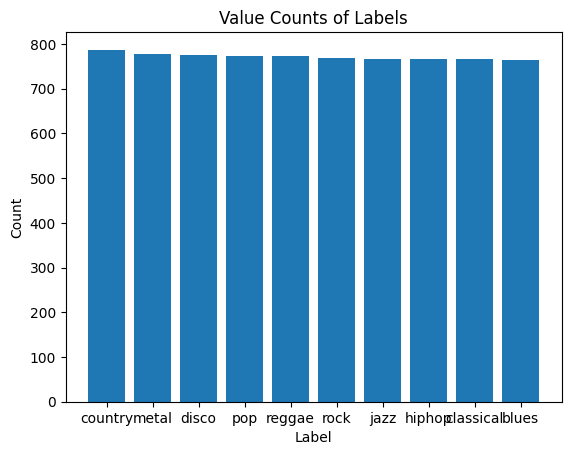

In [ ]:
v=train['label'].value_counts()
plt.bar(v.index, v.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Value Counts of Labels')
plt.show()
 #label counts were not that imbalanced so no further correction steps

<ipython-input-8-2130fd3dacbb>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


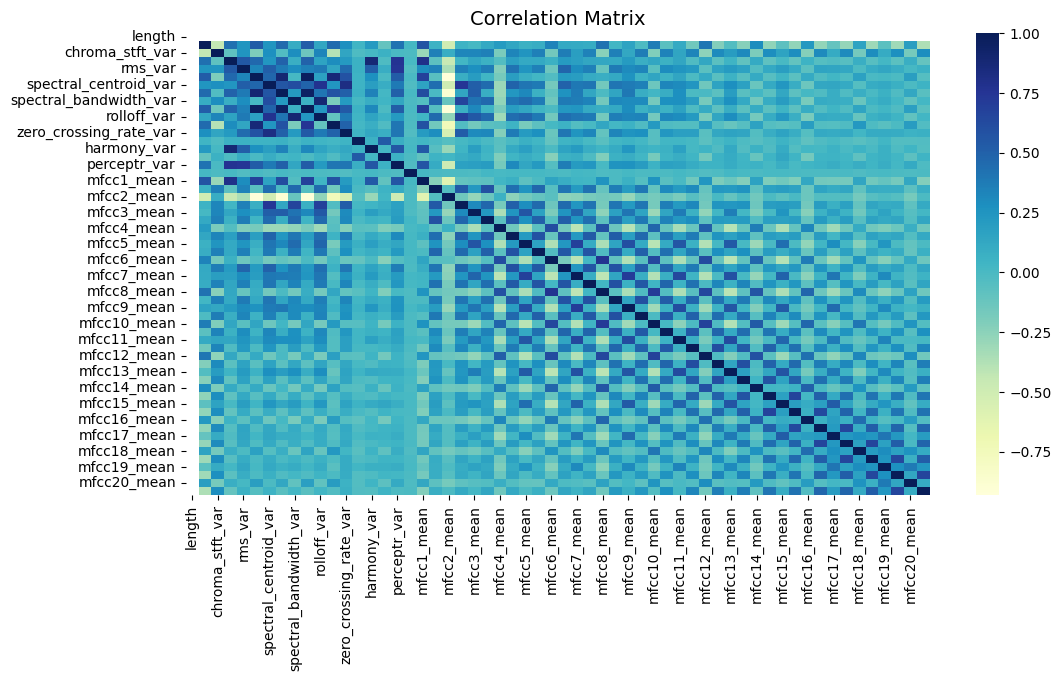

In [ ]:
#This chunk of code is to visualise the dataset by plotting the correlation matrix
import seaborn as sns
data = pd.read_csv('train.csv')

fig, ax = plt.subplots(figsize=(12,6))

corr = data.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

### From visual inspection, we could remove some light coloured blocks which are very weakly correlated, such as length and filename.

From visual inspection, we could remove some light coloured blocks which are very weakly correlated, such as length and filename.

Top 35 Most Important Features:
16               perceptr_var
1            chroma_stft_mean
4                     rms_var
3                    rms_mean
7     spectral_bandwidth_mean
24                 mfcc4_mean
15              perceptr_mean
9                rolloff_mean
18                 mfcc1_mean
14                harmony_var
19                  mfcc1_var
10                rolloff_var
34                 mfcc9_mean
6       spectral_centroid_var
28                 mfcc6_mean
5      spectral_centroid_mean
22                 mfcc3_mean
11    zero_crossing_rate_mean
13               harmony_mean
32                 mfcc8_mean
27                  mfcc5_var
2             chroma_stft_var
20                 mfcc2_mean
25                  mfcc4_var
38                mfcc11_mean
30                 mfcc7_mean
40                mfcc12_mean
23                  mfcc3_var
42                mfcc13_mean
26                 mfcc5_mean
29                  mfcc6_var
8      spectral_bandwidth_var
50      

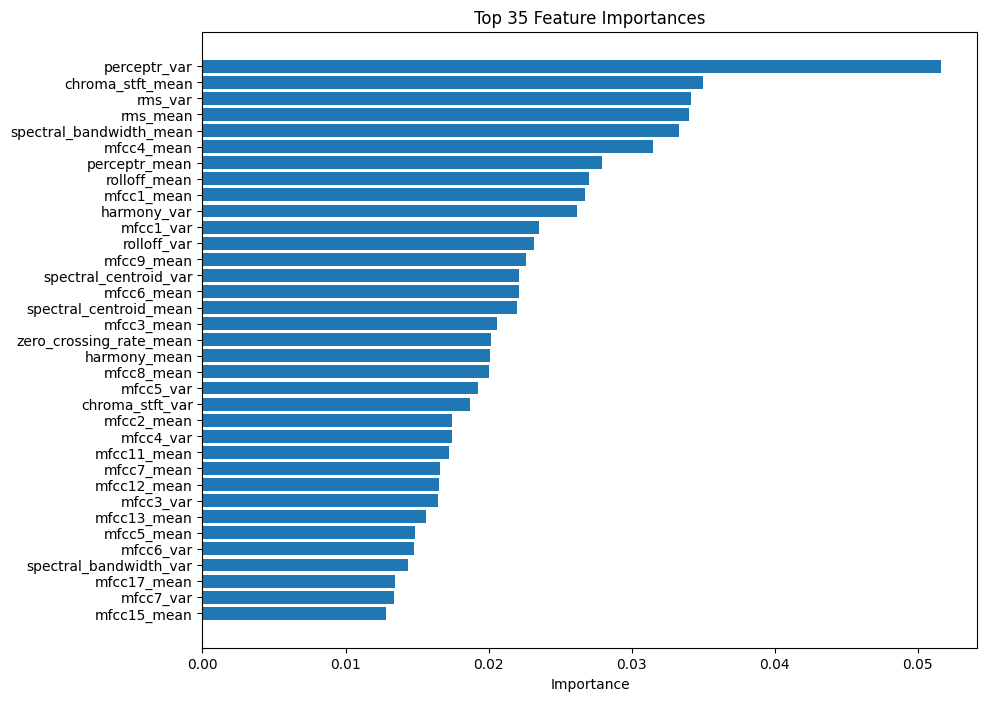

In [ ]:
# Feature importance using RandomForestClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#creating a dataframe to store train.csv
data = pd.read_csv('train.csv')
data1 = data.drop('filename', axis=1)

# Separate features and target variable
X = data1.drop('label', axis=1)  # Dropping 'label' as it is the target variable in test.csv
y = data1['label']  # Target variable

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Here we are creating a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Printing top 35 most important features
top_features = feature_importance_df['Feature'][:35]
print("Top 35 Most Important Features:")
print(top_features)

# Plot the feature importances for the top 35 features
plt.figure(figsize=(10, 8))
plt.barh(top_features, feature_importance_df['Importance'][:35])
plt.xlabel('Importance')
plt.title('Top 35 Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


**From the above plot, we decided to choose the top 35 most important feature for our modelling**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Sample dataset with genre labels
genre_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'label' column to numerical values from 0 to 9
train1 = pd.DataFrame(train)
train1['label_encoded'] = label_encoder.fit_transform(train1['label'])


# Extracting feature and target variables
train2=train1.drop(['length', 'filename','label'], axis=1)
data_fs = train2.values
#print(data_fs)
X_fs = data_fs[:, :-1]
#print(X_fs)
Y_fs = data_fs[:, -1]
#print(Y_fs)

[7. 5. 3. ... 2. 0. 2.]


In [ ]:
#Defining all parameters to run the next chunk of code
from sklearn.model_selection import train_test_split

data123 = train2.values
X123 = data123[:, :-1]
y123 = data123[:, -1]
X123_train, X123_test, Y123_train, Y123_test = train_test_split(X123, y123, test_size=0.25, random_state=0)


In [ ]:
# We initially thought of running many different models to check which gives the best accuracy.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import model_selection
from sklearn.metrics import classification_report

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    dfs = []
    models = [
          ('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier(verbose=False))
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = [str(i) for i in range(10)]
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
    return final



In [ ]:
final = run_exps(X123_train, Y123_train, X123_test, Y123_test)

In [ ]:
#We also experimented with xgBoost, but we finally switched to MLPclassifier as it was giving better accuracy
from sklearn.metrics import accuracy_score
import pandas as pd

data123 = train2.values
X123 = data123[:, :-1]
y123 = data123[:, -1]
X123_train, X123_test, Y123_train, Y123_test = train_test_split(X123, y123, test_size=0.2, random_state=0)

xgb_model = XGBClassifier(verbose=False)
xgb_model.fit(X123_train, Y123_train)

y_pred = xgb_model.predict(X123_test)

accuracy = accuracy_score(Y123_test, y_pred)
print(f"Accuracy on the test dataset: {accuracy:.6f}")

In [ ]:
#We initially used this ANN model, and got a score of 85%
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU



import numpy as np
import pandas as pd

train_vm=pd.read_csv('train.csv')
train_vm.drop(columns=['length','filename'],inplace=True,axis=1)
train_vm.head()

# Load your training dataset (with labels)
# Replace 'train_data.csv' with the actual file path
train_data = train_vm

# Split the training dataset into features (X) and labels (y)
X_train = train_data.drop(columns=['label'])  # Drop 'label' and 'id' columns
y_train = train_data['label']  # Labels

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Now, convert the numerical labels to one-hot encoding (categorical)
num_classes = len(label_encoder.classes_)  # Get the number of unique classes
y_train = to_categorical(y_train, num_classes=num_classes)

# Standardize the feature values (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create an ANN model
# Create an ANN model
model = Sequential()
model.add(Dense(128, input_dim=57, activation=LeakyReLU(alpha=0.01)))  # Input layer with 60 input features
model.add(Dense(64, activation=LeakyReLU(alpha=0.01)))  # Hidden layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer with the number of classes


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you have trained your model and obtained predictions
y_pred = model.predict(X_val)  # Replace with your validation data
y_true = y_val  # Replace with your true validation labels

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)



print(f'MSE: {mse}')
print(f'RMSE: {rmse}')



# Load your test dataset
# Replace 'test.csv' with the actual file path
test_data = pd.read_csv('test.csv')

# Preprocess the test data by removing the 'label' and 'id' columns
X_test = test_data.drop(columns=['length', 'id'])

# Standardize the feature values using the same scaler trained on the training data
X_test = scaler.transform(X_test)  # Assuming 'scaler' was trained on the training data

# Make predictions using your trained model
y_pred = model.predict(X_test)

# If you want to convert the one-hot encoded predictions back to label encoding values
predicted_labels = np.argmax(y_pred, axis=1)

# You can create a DataFrame with the 'id' and 'label' columns for submission
submission_df = pd.DataFrame({'id': test_data['id'], 'label': predicted_labels})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('music_genre_predictions.csv', index=False)



Epoch 1/20
225/225 [==============================] - 6s 6ms/step - loss: 1.3201 - accuracy: 0.5451 - val_loss: 1.0218 - val_accuracy: 0.6593
Epoch 2/20
225/225 [==============================] - 1s 5ms/step - loss: 0.8260 - accuracy: 0.7193 - val_loss: 0.8121 - val_accuracy: 0.7354
Epoch 3/20
225/225 [==============================] - 1s 4ms/step - loss: 0.6653 - accuracy: 0.7796 - val_loss: 0.7273 - val_accuracy: 0.7654
Epoch 4/20
225/225 [==============================] - 1s 4ms/step - loss: 0.5683 - accuracy: 0.8095 - val_loss: 0.6496 - val_accuracy: 0.7849
Epoch 5/20
225/225 [==============================] - 1s 4ms/step - loss: 0.4945 - accuracy: 0.8375 - val_loss: 0.6138 - val_accuracy: 0.7966
Epoch 6/20
225/225 [==============================] - 1s 4ms/step - loss: 0.4413 - accuracy: 0.8505 - val_loss: 0.5758 - val_accuracy: 0.8171
Epoch 7/20
225/225 [==============================] - 1s 6ms/step - loss: 0.3915 - accuracy: 0.8682 - val_loss: 0.5708 - val_accuracy: 0.8121
Epoch 

In [ ]:
#FINAL MODEL WHICH WE USED TO GET 92.39% ACCURACY SCORE
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


train_data = pd.read_csv('train.csv')

# Removing filename column as it is a string, for preprocessing
train_data = train_data.drop(columns=['filename'])
X = train_data.drop(columns=['length', 'label'])
y = train_data['label']

# Define the list of the top 35 features from the randomforestclassifier code
top_features = [
    'perceptr_var', 'chroma_stft_mean', 'rms_var', 'rms_mean', 'spectral_bandwidth_mean',
    'mfcc4_mean', 'perceptr_mean', 'rolloff_mean', 'mfcc1_mean', 'harmony_var',
    'mfcc1_var', 'rolloff_var', 'mfcc9_mean', 'spectral_centroid_var', 'mfcc6_mean',
    'spectral_centroid_mean', 'mfcc3_mean', 'zero_crossing_rate_mean', 'harmony_mean',
    'mfcc8_mean', 'mfcc5_var', 'chroma_stft_var', 'mfcc2_mean', 'mfcc4_var',
    'mfcc11_mean', 'mfcc7_mean', 'mfcc12_mean', 'mfcc3_var', 'mfcc13_mean', 'mfcc5_mean',
    'mfcc6_var', 'spectral_bandwidth_var', 'mfcc17_mean', 'mfcc7_var', 'mfcc15_mean'
]

# Select the top 35 features
X = X[top_features]

# Standardize the feature values (mean=0, std=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLPClassifier model with a customized architecture and activation function
model = MLPClassifier(
    hidden_layer_sizes=(256,512,1024, 512, 64, 32),  # We experimented with different hidden layer sizes and found this to give best results
    activation='tanh',  # Using tanh function as it gave us better accuracy than relu
    max_iter=1000,
    verbose=1 #added this line of code so as to monitor the loss during every iteration in runtime
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the validation set
validation_accuracy = model.score(X_val, y_val)
print(f'Validation Accuracy: {validation_accuracy}')

# Load your test dataset
# Replace 'test.csv' with the actual file path
test_data = pd.read_csv('test.csv')

# Preprocess the test data
X_test = test_data[top_features]  # Include the top 35 features

# Standardize the feature values using the same scaler trained on the training data
X_test = scaler.transform(X_test)

# Make predictions using your trained model
predicted_labels = model.predict(X_test)

#submission
submission_df = pd.DataFrame({'id': test_data['id'], 'label': predicted_labels})
submission_df.to_csv('music_genre_predictions_top35.csv', index=False)

### We had to manually terminate the code while it was running as during runtime the loss metric reaches its lowest point and tends to increase
#again, which would lower our validation accuracy. When the Loss metric reached the value 0.01


Iteration 1, loss = 1.27800830
Iteration 2, loss = 0.93254536
Iteration 3, loss = 0.77398026
Iteration 4, loss = 0.66555756


In [ ]:
#This piece of code is to format the submission file as per the rules.
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.read_csv('music_genre_predictions_top35.csv')

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data.to_csv('submission.csv',index=False)